In [1]:
import os
os.chdir("/Users/mariusmahiout/Documents/repos/ising_core/python")
import src.preprocessing as pre
import src.model_eval as eval
import src.utils as utils
import src.misc_plotting as misc_plotting
os.chdir("..")

import numpy as np
import matplotlib.pyplot as plt
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from IPython.display import display, HTML
from ipywidgets import HBox, VBox, widgets

plotly.offline.init_notebook_mode()
display(HTML(
    '<script type="text/javascript" async src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.1/MathJax.js?config=TeX-MML-AM_SVG"></script>'
))

## Sensitivity testing : temporal resolution

### Seven

In [2]:
mouse_name = "Seven"
sens_param = "time"
sample_names = ["performing1", "performing2", "observing1", "observing2"]
path = "analyses/empirical_obs/" + f"{sens_param}_sensitivity/{mouse_name}/"
utils.make_dir(path)

bin_widths = [50, 150, 250]
labels = [str(bin_width) + " ms" for bin_width in bin_widths]


# PPC, mouse Seven
# performing
samples1 = [pre.get_recording_sample(fname="Resulttable_Seven_1504_1813.mat", mouse_name=mouse_name, bin_width=bin_width) for bin_width in bin_widths]
samples2 = [pre.get_recording_sample(fname="Resulttable_Seven_1504_1850.mat", mouse_name=mouse_name, bin_width=bin_width) for bin_width in bin_widths]

# observing
samples3 = [pre.get_recording_sample(fname="Resulttable_Seven_1504_1825.mat", mouse_name=mouse_name, bin_width=bin_width) for bin_width in bin_widths]
samples4 = [pre.get_recording_sample(fname="Resulttable_Seven_1504_1837.mat", mouse_name=mouse_name, bin_width=bin_width) for bin_width in bin_widths]

all_samples = [samples1, samples2, samples3, samples4]

# plotting
misc_plotting.plot_empirical_histograms(all_samples, labels, path=path + f"{mouse_name}_{sens_param}_sens.pdf")

# hypothesis testing
utils.do_ks_sensitivity_tests(
    labels,
    all_samples,
    sample_names,
    mouse_name,
    sens_param,
    path,
)

Directory 'analyses/empirical_obs/time_sensitivity/Seven/' already exists.


FigureWidget({
    'data': [{'legendgroup': '50 ms',
              'marker': {'color': '#0055d4', 'opacity': 0.75},
              'name': '50 ms',
              'showlegend': True,
              'type': 'bar',
              'uid': '9ac6e00e-f9d4-4147-969d-463d42d98b4e',
              'width': 0.007947756009448382,
              'x': array([-0.99602612, -0.98807837, -0.98013061, -0.97218285, -0.9642351 ,
                          -0.95628734, -0.94833959, -0.94039183, -0.93244407, -0.92449632,
                          -0.91654856, -0.90860081, -0.90065305, -0.89270529, -0.88475754,
                          -0.87680978, -0.86886203, -0.86091427, -0.85296651, -0.84501876,
                          -0.837071  , -0.82912325, -0.82117549, -0.81322773, -0.80527998,
                          -0.79733222, -0.78938447, -0.78143671, -0.77348895, -0.7655412 ,
                          -0.75759344]),
              'xaxis': 'x',
              'y': array([0.04672897, 0.12616822, 0.21495327, 0.26168

Button(description='Save Figure', style=ButtonStyle())

Seven, time sensitivity
performing1:
test statistics:


50 ms   150 ms   250 ms
50 ms  0.00e+00 1.57e-02 2.74e-02
150 ms 1.57e-02 0.00e+00 1.17e-02
250 ms 2.74e-02 1.17e-02 0.00e+00

p-values:


50 ms    150 ms    250 ms
50 ms   1.00e+00 3.94e-138 3.16e-279
150 ms 3.94e-138  1.00e+00  2.11e-38
250 ms 3.16e-279  2.11e-38  1.00e+00

performing2:
test statistics:


50 ms   150 ms   250 ms
50 ms  0.00e+00 1.23e-02 2.13e-02
150 ms 1.23e-02 0.00e+00 9.02e-03
250 ms 2.13e-02 9.02e-03 0.00e+00

p-values:


50 ms   150 ms    250 ms
50 ms   1.00e+00 4.24e-85 9.90e-170
150 ms  4.24e-85 1.00e+00  4.20e-23
250 ms 9.90e-170 4.20e-23  1.00e+00

observing1:
test statistics:


50 ms   150 ms   250 ms
50 ms  0.00e+00 8.86e-03 1.54e-02
150 ms 8.86e-03 0.00e+00 6.52e-03
250 ms 1.54e-02 6.52e-03 0.00e+00

p-values:


50 ms   150 ms   250 ms
50 ms  1.00e+00 3.51e-44 2.45e-88
150 ms 3.51e-44 1.00e+00 2.80e-12
250 ms 2.45e-88 2.80e-12 1.00e+00

observing2:
test statistics:


50 ms   150 ms   250 ms
50 ms  0.00e+00 5.75e-03 9.98e-03
150 ms 5.75e-03 0.00e+00 4.23e-03
250 ms 9.98e-03 4.23e-03 0.00e+00

p-values:


50 ms   150 ms   250 ms
50 ms  1.00e+00 7.63e-19 2.10e-37
150 ms 7.63e-19 1.00e+00 2.08e-05
250 ms 2.10e-37 2.08e-05 1.00e+00

In [14]:
num_units = samples1[0].getStates().shape[0]

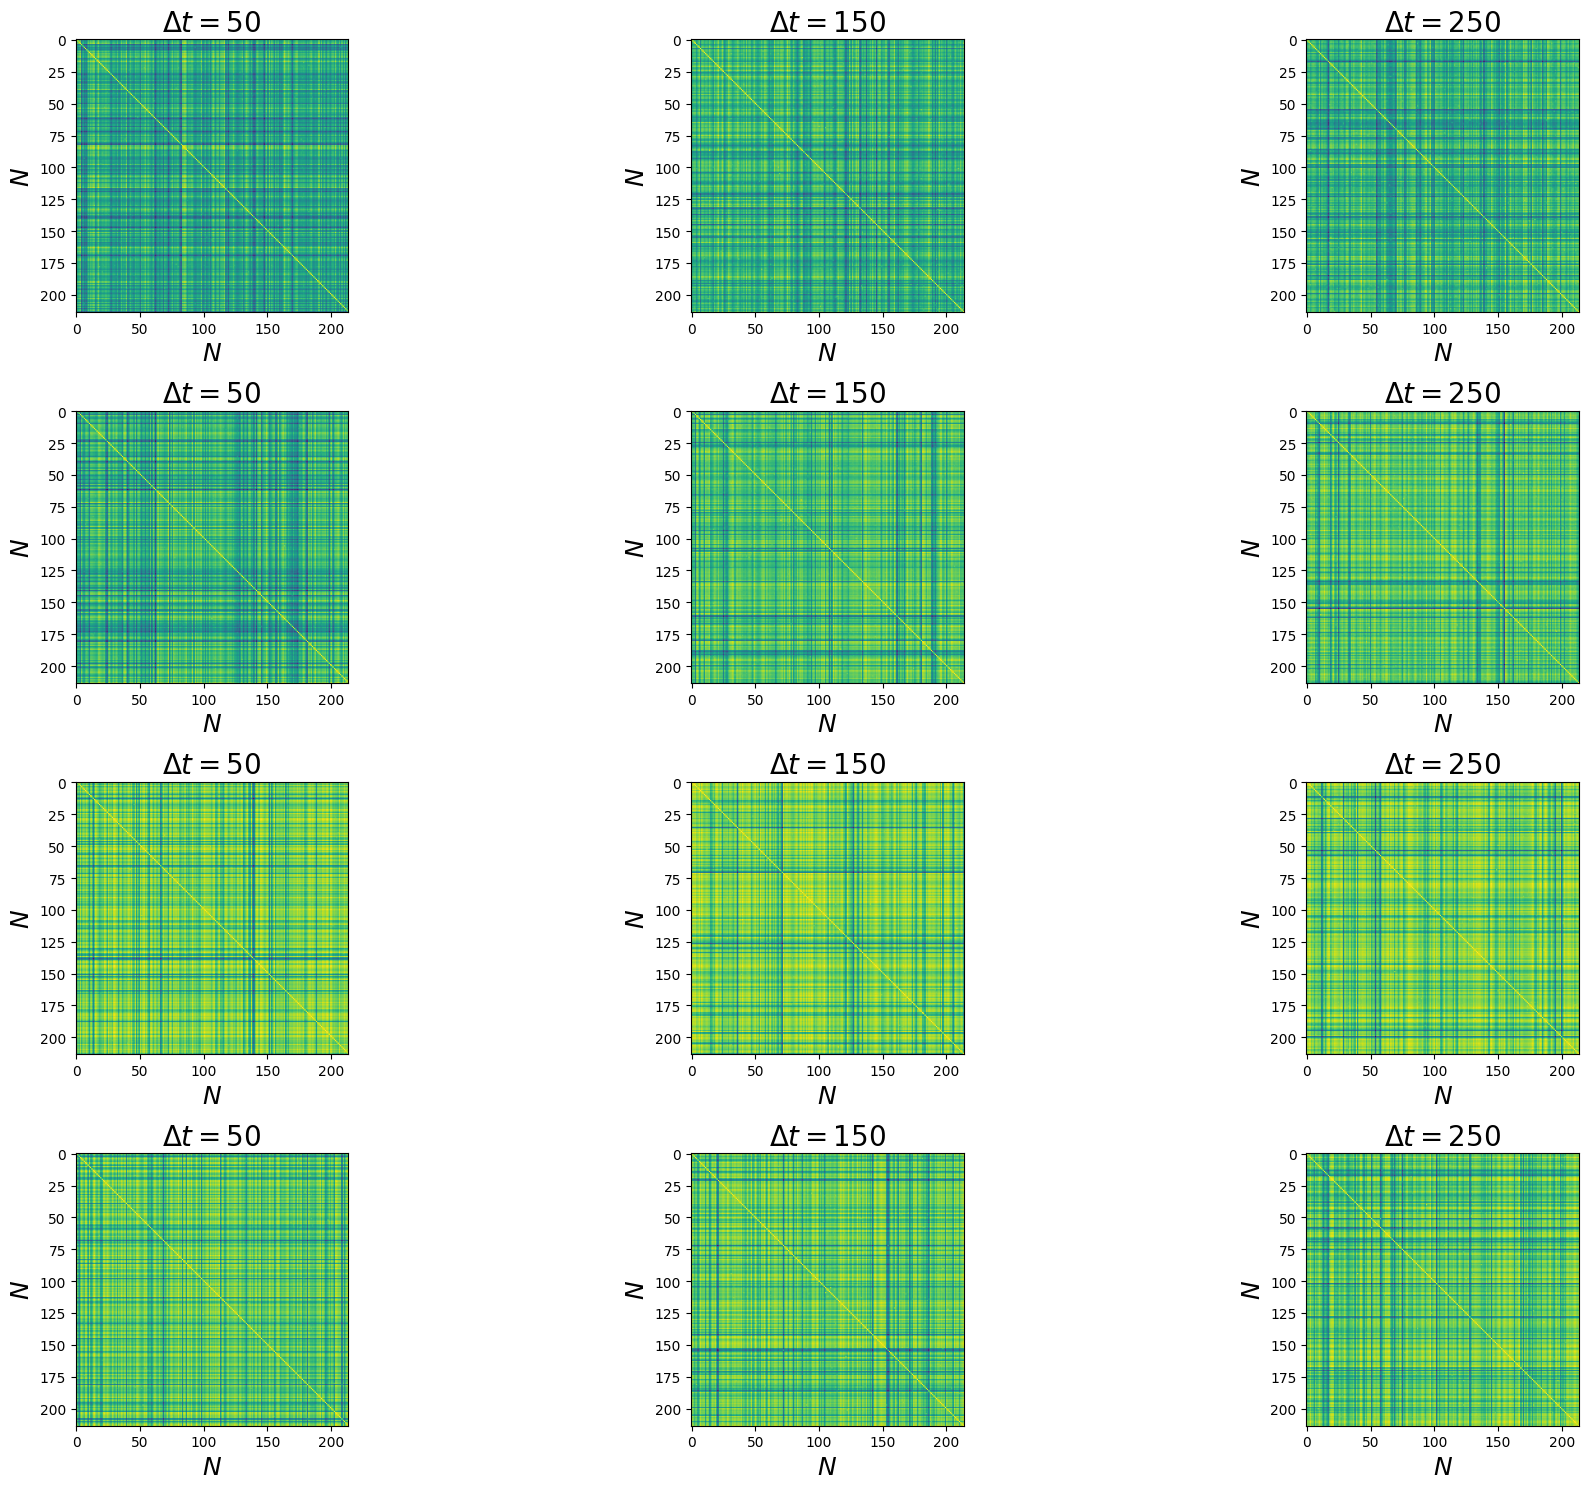

In [45]:
means = utils.get_all_recording_means(all_samples)
pcorrs = utils.get_all_recording_pcorrs(all_samples)

def index2rec_type(idx: int):
    if idx in (0,1):
         return "Performing"
    elif idx in (2,3):
        return "Observing"
    else:
         raise ValueError("Invalid index.")

num_samples = len(all_samples)
num_bin_widths = len(bin_widths)
fig, ax = plt.subplots(nrows=num_samples, ncols=num_bin_widths, figsize=(num_samples*5, num_bin_widths * 5))

for sample_num in range(len(all_samples)):
    for bin_width_num in range(len(bin_widths)):
        ax[sample_num][bin_width_num].imshow(pcorrs[sample_num][bin_width_num].reshape((num_units, num_units)))
        ax[sample_num][bin_width_num].set_title(fr"$\Delta t = {bin_widths[bin_width_num]}$", size=20)
        ax[sample_num][bin_width_num].set_xlabel(r"$N$", size=18)
        ax[sample_num][bin_width_num].set_ylabel(r"$N$", size=18)
    #fig.suptitle(f"{index2rec_type(sample_num)} {(sample_num % 2) + 1}", size=22)

fig.tight_layout()
plt.show()

# make all colormaps be on the same scale and display a colorbar

### Angie

In [3]:
mouse_name = "Angie"
sens_param = "time"
sample_names = ["performing1", "performing2", "observing1", "observing2"]
path = "analyses/empirical_obs/" + f"{sens_param}_sensitivity/{mouse_name}/"
utils.make_dir(path)

bin_widths = [50, 150, 250]
labels = [str(bin_width) + " ms" for bin_width in bin_widths]


# M2, mouse Angie
# perfomring
samples1 = [pre.get_recording_sample(fname="RESULTS_Angie_20170825_1220_allbeh_1000s.mat", mouse_name=mouse_name, bin_width=bin_width) for bin_width in bin_widths]
samples2 = [pre.get_recording_sample(fname="RESULTS_Angie_20170825_1232_allbeh_1000s.mat", mouse_name=mouse_name, bin_width=bin_width) for bin_width in bin_widths]

# observing
samples3 = [pre.get_recording_sample(fname="RESULTS_Angie_20170825_1248_allbeh_1000s.mat", mouse_name=mouse_name, bin_width=bin_width) for bin_width in bin_widths]
samples4 = [pre.get_recording_sample(fname="RESULTS_Angie_20170825_1158_allbeh_1000s.mat", mouse_name=mouse_name, bin_width=bin_width) for bin_width in bin_widths]

all_samples = [samples1, samples2, samples3, samples4]

# plotting
misc_plotting.plot_empirical_histograms(all_samples, labels, path=path + f"{mouse_name}_{sens_param}_sens.pdf")

# hypothesis testing
utils.do_ks_sensitivity_tests(
    labels, 
    all_samples, 
    sample_names,
    mouse_name,
    sens_param,
    path,
)

Directory 'analyses/empirical_obs/time_sensitivity/Angie/' already exists.


FigureWidget({
    'data': [{'legendgroup': '50 ms',
              'marker': {'color': '#0055d4', 'opacity': 0.75},
              'name': '50 ms',
              'showlegend': True,
              'type': 'bar',
              'uid': 'a4e0f52e-f977-490e-a049-ecb14bae5b1d',
              'width': 0.016727272727272726,
              'x': array([-0.99163636, -0.97490909, -0.95818182, -0.94145455, -0.92472727,
                          -0.908     , -0.89127273, -0.87454545, -0.85781818, -0.84109091,
                          -0.82436364, -0.80763636, -0.79090909, -0.77418182, -0.75745455,
                          -0.74072727, -0.724     , -0.70727273, -0.69054545, -0.67381818,
                          -0.65709091, -0.64036364, -0.62363636, -0.60690909, -0.59018182,
                          -0.57345455, -0.55672727, -0.54      , -0.52327273, -0.50654545]),
              'xaxis': 'x',
              'y': array([5.45136284e-02, 1.45703092e-01, 2.09969159e-01, 2.90655997e-01,
                  

Button(description='Save Figure', style=ButtonStyle())

Angie, time sensitivity
performing1:
test statistics:


50 ms   150 ms   250 ms
50 ms  0.00e+00 4.05e-02 7.09e-02
150 ms 4.05e-02 0.00e+00 3.04e-02
250 ms 7.09e-02 3.04e-02 0.00e+00

p-values:


50 ms   150 ms   250 ms
50 ms  1.00e+00 0.00e+00 0.00e+00
150 ms 0.00e+00 1.00e+00 0.00e+00
250 ms 0.00e+00 0.00e+00 1.00e+00

performing2:
test statistics:


50 ms   150 ms   250 ms
50 ms  0.00e+00 3.72e-02 6.54e-02
150 ms 3.72e-02 0.00e+00 2.82e-02
250 ms 6.54e-02 2.82e-02 0.00e+00

p-values:


50 ms    150 ms    250 ms
50 ms  1.00e+00  0.00e+00  0.00e+00
150 ms 0.00e+00  1.00e+00 8.85e-286
250 ms 0.00e+00 8.85e-286  1.00e+00

observing1:
test statistics:


50 ms   150 ms   250 ms
50 ms  0.00e+00 3.30e-02 5.85e-02
150 ms 3.30e-02 0.00e+00 2.55e-02
250 ms 5.85e-02 2.55e-02 0.00e+00

p-values:


50 ms    150 ms    250 ms
50 ms  1.00e+00  0.00e+00  0.00e+00
150 ms 0.00e+00  1.00e+00 5.08e-233
250 ms 0.00e+00 5.08e-233  1.00e+00

observing2:
test statistics:


50 ms   150 ms   250 ms
50 ms  0.00e+00 5.98e-02 1.04e-01
150 ms 5.98e-02 0.00e+00 4.39e-02
250 ms 1.04e-01 4.39e-02 0.00e+00

p-values:


50 ms   150 ms   250 ms
50 ms  1.00e+00 0.00e+00 0.00e+00
150 ms 0.00e+00 1.00e+00 0.00e+00
250 ms 0.00e+00 0.00e+00 1.00e+00

Saved to analyses/empirical_obs/time_sensitivity/Angie/Angie_time_sens.pdf


## Sensitivity testing : sub-samples

### Seven

In [4]:
mouse_name = "Seven"
sens_param = "subs"
sample_names = ["performing1", "performing2", "observing1", "observing2"]
path = "analyses/empirical_obs/" + f"{sens_param}_sensitivity/{mouse_name}/"
utils.make_dir(path)

# PPC, mouse Seven
# performing
samples1 = pre.get_partitioned_sample(fname="Resulttable_Seven_1504_1813.mat", mouse_name=mouse_name, num_subsamples=3)
samples2 = pre.get_partitioned_sample(fname="Resulttable_Seven_1504_1850.mat", mouse_name=mouse_name, num_subsamples=3)

# observing
samples3 = pre.get_partitioned_sample(fname="Resulttable_Seven_1504_1825.mat", mouse_name=mouse_name, num_subsamples=3)
samples4 = pre.get_partitioned_sample(fname="Resulttable_Seven_1504_1837.mat", mouse_name=mouse_name, num_subsamples=3)

all_samples = [samples1, samples2, samples3, samples4]
labels = [f"sample{i+1}" for i in range(len(samples1))]

# plotting
misc_plotting.plot_empirical_histograms(all_samples, labels, path=path + f"{mouse_name}_{sens_param}_sens.pdf")

# hypothesis testing
utils.do_ks_sensitivity_tests(
    labels, 
    all_samples, 
    sample_names,
    mouse_name,
    sens_param,
    path,
)

Directory 'analyses/empirical_obs/subs_sensitivity/Seven/' already exists.


FigureWidget({
    'data': [{'legendgroup': 'sample1',
              'marker': {'color': '#0055d4', 'opacity': 0.75},
              'name': 'sample1',
              'showlegend': True,
              'type': 'bar',
              'uid': 'eeb6737e-e044-4e34-a1e3-5aa9bbcfb932',
              'width': 0.009389671361502346,
              'x': array([-0.99530516, -0.98591549, -0.97652582, -0.96713615, -0.95774648,
                          -0.94835681, -0.93896714, -0.92957746, -0.92018779, -0.91079812,
                          -0.90140845, -0.89201878, -0.88262911, -0.87323944, -0.86384977,
                          -0.85446009, -0.84507042, -0.83568075, -0.82629108, -0.81690141,
                          -0.80751174, -0.79812207, -0.78873239, -0.77934272, -0.76995305,
                          -0.76056338, -0.75117371, -0.74178404, -0.73239437, -0.72300469,
                          -0.71361502]),
              'xaxis': 'x',
              'y': array([4.30357589e-01, 0.00000000e+00, 3.09160

Button(description='Save Figure', style=ButtonStyle())

Seven, subs sensitivity
performing1:
test statistics:


sample1  sample2  sample3
sample1 0.00e+00 7.04e-05 1.07e-03
sample2 7.04e-05 0.00e+00 1.14e-03
sample3 1.07e-03 1.14e-03 0.00e+00

p-values:


sample1  sample2  sample3
sample1 1.00e+00 1.00e+00 7.18e-01
sample2 1.00e+00 1.00e+00 6.41e-01
sample3 7.18e-01 6.41e-01 1.00e+00

performing2:
test statistics:


sample1  sample2  sample3
sample1 0.00e+00 1.21e-03 2.14e-03
sample2 1.21e-03 0.00e+00 9.32e-04
sample3 2.14e-03 9.32e-04 0.00e+00

p-values:


sample1  sample2  sample3
sample1 1.00e+00 5.60e-01 4.00e-02
sample2 5.60e-01 1.00e+00 8.53e-01
sample3 4.00e-02 8.53e-01 1.00e+00

observing1:
test statistics:


sample1  sample2  sample3
sample1 0.00e+00 5.37e-04 3.29e-03
sample2 5.37e-04 0.00e+00 2.75e-03
sample3 3.29e-03 2.75e-03 0.00e+00

p-values:


sample1  sample2  sample3
sample1 1.00e+00 1.00e+00 1.99e-04
sample2 1.00e+00 1.00e+00 3.15e-03
sample3 1.99e-04 3.15e-03 1.00e+00

observing2:
test statistics:


sample1  sample2  sample3
sample1 0.00e+00 7.65e-04 1.31e-03
sample2 7.65e-04 0.00e+00 5.47e-04
sample3 1.31e-03 5.47e-04 0.00e+00

p-values:


sample1  sample2  sample3
sample1 1.00e+00 9.64e-01 4.55e-01
sample2 9.64e-01 1.00e+00 1.00e+00
sample3 4.55e-01 1.00e+00 1.00e+00

Saved to analyses/empirical_obs/subs_sensitivity/Seven/Seven_subs_sens.pdf


### Angie

In [5]:
mouse_name = "Angie"
sens_param = "subs"
sample_names = ["performing1", "performing2", "observing1", "observing2"]
path = "analyses/empirical_obs/" + f"{sens_param}_sensitivity/{mouse_name}/"
utils.make_dir(path)

# M2, mouse Angie
# performing
samples1 = pre.get_partitioned_sample(fname="RESULTS_Angie_20170825_1232_allbeh_1000s.mat", mouse_name="Angie", num_subsamples=3)
samples2 = pre.get_partitioned_sample(fname="RESULTS_Angie_20170825_1220_allbeh_1000s.mat", mouse_name="Angie", num_subsamples=3)

# observing
samples3 = pre.get_partitioned_sample(fname="RESULTS_Angie_20170825_1158_allbeh_1000s.mat", mouse_name="Angie", num_subsamples=3)
samples4 = pre.get_partitioned_sample(fname="RESULTS_Angie_20170825_1248_allbeh_1000s.mat", mouse_name="Angie", num_subsamples=3)

all_samples = [samples1, samples2, samples3, samples4]
labels = [f"sample{i+1}" for i in range(len(samples1))]

# plotting
misc_plotting.plot_empirical_histograms(all_samples, labels, path=path + f"{mouse_name}_{sens_param}_sens.pdf")

# hypothesis testing
utils.do_ks_sensitivity_tests(
    labels, 
    all_samples, 
    sample_names,
    mouse_name,
    sens_param,
    path,
)

Directory 'analyses/empirical_obs/subs_sensitivity/Angie/' already exists.


FigureWidget({
    'data': [{'legendgroup': 'sample1',
              'marker': {'color': '#0055d4', 'opacity': 0.75},
              'name': 'sample1',
              'showlegend': True,
              'type': 'bar',
              'uid': 'e1a5176c-ff99-456b-a0fa-31d7434b84cd',
              'width': 0.012454212454212455,
              'x': array([-0.99377289, -0.98131868, -0.96886447, -0.95641026, -0.94395604,
                          -0.93150183, -0.91904762, -0.90659341, -0.89413919, -0.88168498,
                          -0.86923077, -0.85677656, -0.84432234, -0.83186813, -0.81941392,
                          -0.80695971, -0.79450549, -0.78205128, -0.76959707, -0.75714286,
                          -0.74468864, -0.73223443, -0.71978022, -0.70732601, -0.69487179,
                          -0.68241758, -0.66996337, -0.65750916, -0.64505495, -0.63260073]),
              'xaxis': 'x',
              'y': array([1.88245102e-01, 2.69945811e-01, 0.00000000e+00, 2.24343476e-01,
              

Button(description='Save Figure', style=ButtonStyle())

Angie, subs sensitivity
performing1:
test statistics:


sample1  sample2  sample3
sample1 0.00e+00 2.16e-03 7.97e-03
sample2 2.16e-03 0.00e+00 5.82e-03
sample3 7.97e-03 5.82e-03 0.00e+00

p-values:


sample1  sample2  sample3
sample1 1.00e+00 1.25e-02 1.42e-30
sample2 1.25e-02 1.00e+00 1.77e-16
sample3 1.42e-30 1.77e-16 1.00e+00

performing2:
test statistics:


sample1  sample2  sample3
sample1 0.00e+00 5.47e-04 1.62e-03
sample2 5.47e-04 0.00e+00 1.07e-03
sample3 1.62e-03 1.07e-03 0.00e+00

p-values:


sample1  sample2  sample3
sample1 1.00e+00 9.97e-01 1.15e-01
sample2 9.97e-01 1.00e+00 5.58e-01
sample3 1.15e-01 5.58e-01 1.00e+00

observing1:
test statistics:


sample1  sample2  sample3
sample1 0.00e+00 3.05e-03 5.62e-03
sample2 3.05e-03 0.00e+00 8.67e-03
sample3 5.62e-03 8.67e-03 0.00e+00

p-values:


sample1  sample2  sample3
sample1 1.00e+00 7.65e-05 2.19e-15
sample2 7.65e-05 1.00e+00 4.65e-36
sample3 2.19e-15 4.65e-36 1.00e+00

observing2:
test statistics:


sample1  sample2  sample3
sample1 0.00e+00 1.44e-03 8.83e-03
sample2 1.44e-03 0.00e+00 7.39e-03
sample3 8.83e-03 7.39e-03 0.00e+00

p-values:


sample1  sample2  sample3
sample1 1.00e+00 2.07e-01 2.18e-37
sample2 2.07e-01 1.00e+00 2.61e-26
sample3 2.18e-37 2.61e-26 1.00e+00

Saved to analyses/empirical_obs/subs_sensitivity/Angie/Angie_subs_sens.pdf


## Sensitivity testing : system size

In [24]:
sample1 = pre.get_recording_sample(fname="Resulttable_Seven_1504_1813.mat", mouse_name="Seven")
sample2 = pre.get_recording_sample(fname="Resulttable_Seven_1504_1813.mat", mouse_name="Seven")
sample3 = pre.get_recording_sample(fname="Resulttable_Seven_1504_1813.mat", mouse_name="Seven")
sample4 = pre.get_recording_sample(fname="Resulttable_Seven_1504_1813.mat", mouse_name="Seven")
sample5 = pre.get_recording_sample(fname="Resulttable_Seven_1504_1813.mat", mouse_name="Seven")

dt_range = utils.int_linspace(1, 200, 5)
print(list(dt_range))

dcorrs = [
    sample1.getDelayedCorrs(dt_range[0]),
    sample2.getDelayedCorrs(dt_range[1]),
    sample3.getDelayedCorrs(dt_range[2]),
    sample4.getDelayedCorrs(dt_range[3]),
    sample5.getDelayedCorrs(dt_range[4]),
]

dcorrs_sd = [np.std(dcorr) for dcorr in dcorrs]

[1, 51, 100, 150, 200]


In [27]:
layout_spec = {
    (1, 1): {
        "data": dcorrs_sd,
        "label": r"$\Large  \hat{SD} \langle(\sigma_i(t+\delta t) \sigma_j(t)) \rangle$",
        "steps": list(dt_range),
        "step_label": "",
    },
    (2, 1): {
        "data": dcorrs,
        "label": r"$\Large \langle(\sigma_i(t+\delta t) \sigma_j(t)) \rangle$",
        "steps": list(dt_range),
        "step_label": r"$\Large \delta t$",
    },
}

misc_plotting.plot_generalized(layout_spec, path="analyses/empirical_obs/seven_1813_dcorrs.pdf")

Button(description='Save Figure', style=ButtonStyle())

Saved to analyses/empirical_obs/seven_1158_dcorrs.pdf
